In [1]:
from xd import *
from utils import *
import esutil
import healpy as hp
from systematics import *

from matplotlib import rc
import matplotlib.pylab as plt

import sys
sys.path.append('/n/des/lee.5922/programs/cosmolike/MG_musigma/')
#rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
#rc('text', usetex=True)

from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

%load_ext autoreload
%autoreload 2

/n/home00/lee.5922/.local/lib/python2.7/site-packages/subprocess32.py:472: RuntimeWarning: The _posixsubprocess module is not being used. Child process reliability may suffer if your program uses threads.
  "program uses threads.", RuntimeWarning)


sample size (90000, 1) (90000, 1)


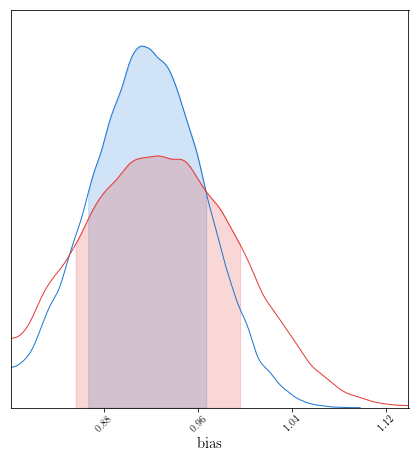

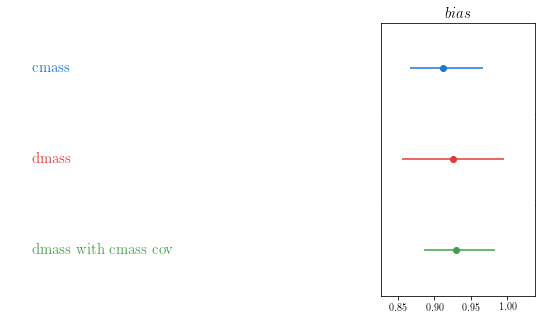

In [2]:
from plot_chain import plot_single, plot_triple, plot_distributions, plot_summary_bar
path = '/n/des/lee.5922/programs/cosmolike/MG_musigma/'
cmass_chains = np.genfromtxt(path+'like/like_cmass_sgc_bias_sam120000')[30000:-2,:-2]
dmass_chains = np.genfromtxt(path+'like/like_dmass_spt_bias_sam120000')[30000:,:-2]
dmass_chains_cmasscov = np.genfromtxt(path+'like/like_dmass_spt_bias_cmasscov_sam120000')[30000:,:-2]
print 'sample size', cmass_chains.shape, dmass_chains.shape
params = ['bias']
truth = [1.0]
figname = 'figure/like_test.png'
chain_names = ['cmass', 'dmass', 'dmass with cmass cov']
#plot_triple([cmass_chains, cmass_chains], 
#            [params, params], 
#            None, figname, chain_names = chain_names)

#plot_single(dmass_chains, params, truth, figname)

plot_distributions([cmass_chains, dmass_chains], params, params_truth = None, chain_names = chain_names, \
                  figname = 'figure/plot_distributions_cmass_dmass_bias.pdf')
plot_summary_bar([cmass_chains, dmass_chains, dmass_chains_cmasscov], params, params_truth=None, chain_names=chain_names)


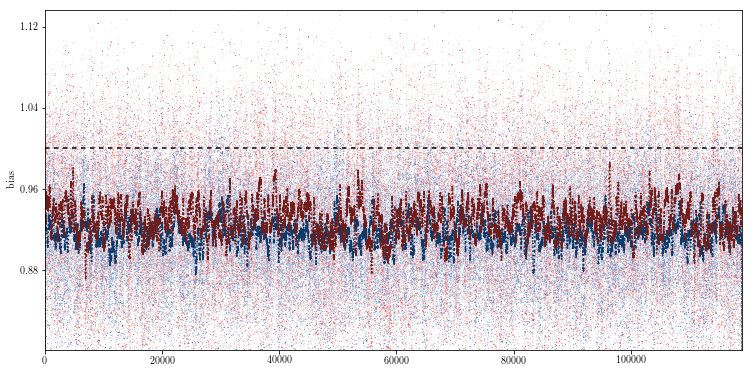

In [80]:
from chainconsumer import ChainConsumer

c = ChainConsumer()
  
c.add_chain(cmass_chains, parameters=params, name='cmass_chains')
c.add_chain(dmass_chains, parameters=params, name='dmass_chains')

    
#c.configure(label_font_size = 15)
fig = c.plotter.plot_walks(truth={"bias": 1.0}, convolve=100)

#fig = c.plotter.plot_distributions(truth=[1.0])
fig.set_size_inches(4.5 + fig.get_size_inches())   